# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [29]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [30]:
tips = sns.load_dataset('tips') #Carregando base de dados de gorjeta
tips['tip_pct'] = tips['tip'] / (tips['total_bill']-tips['tip']) #Criando coluna percentual
tips['net_bill'] = tips['total_bill'] - tips['tip'] #Criando coluna total liquido (total a pagar menos gorjeta)
tips.head() #Visualizando os dados

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [31]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           5.02e-23
Time:                        19:13:44   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

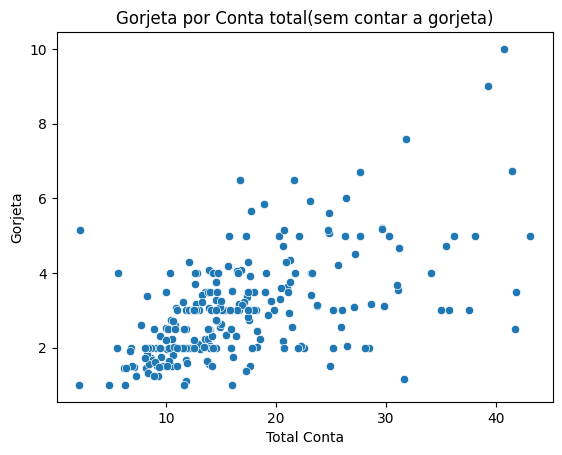

In [62]:
sns.scatterplot(x='net_bill', y='tip', data=tips)
plt.xlabel('Total Conta')
plt.ylabel('Gorjeta')
plt.title('Gorjeta por Conta total(sem contar a gorjeta)')
plt.show()

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [32]:
#Ajustando para net_bill 'normal' para poder comparar
reg_pct = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg_pct.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           1.52e-06
Time:                        19:13:44   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

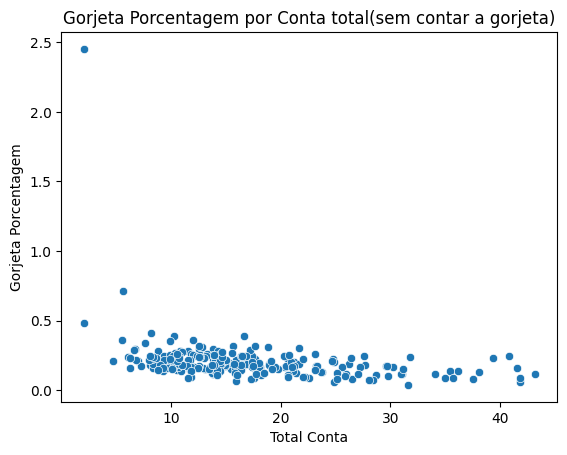

In [33]:
sns.scatterplot(x='net_bill', y='tip_pct', data=tips)
plt.xlabel('Total Conta')
plt.ylabel('Gorjeta Porcentagem')
plt.title('Gorjeta Porcentagem por Conta total(sem contar a gorjeta)')
plt.show()

In [34]:
#Criando a coluna log_net_bill para guardar os valores de logaritimo criado pela função log do num py
tips['log_net_bill'] = np.log(tips['net_bill'])

In [57]:
#Ajustando para log_net_bill (variável/coluna com os valores em logaritimo)
reg_log_net_bill = smf.ols('tip_pct ~ log_net_bill', data = tips).fit()
reg_log_net_bill.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           1.62e-13
Time:                        19:49:51   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6181      0.054     11.444      0.000       0.512       0.724
log_net_bill    -0.1534      0.020     -7.820      0.000      -0.192      -0.115
==============================================================================
Omnibus:                      440.899   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171509.052
Skew:                           9.850   Prob(JB):                         0.00
Kurtosis:                     131.381   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Obtendo os valores previstos na escala logarítmica, para ter uma noção
predicted_log_net_bill = reg_log_net_bill.predict(tips['log_net_bill'])
predicted_log_net_bill

0      0.192945
1      0.286571
2      0.178918
3      0.155709
4      0.151183
         ...   
239    0.136349
240    0.123190
241    0.153467
242    0.192083
243    0.194877
Length: 244, dtype: float64

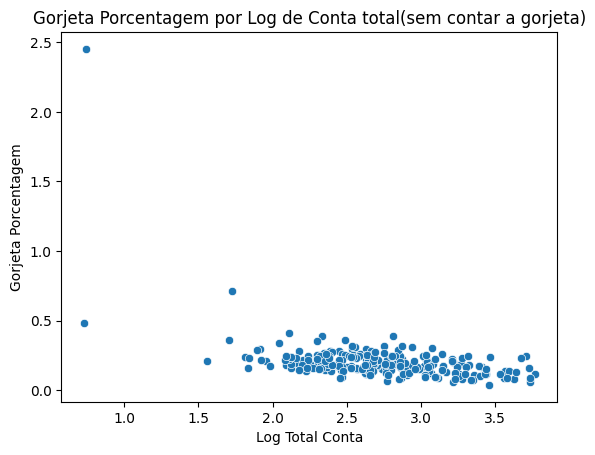

In [50]:
sns.scatterplot(x='log_net_bill', y='tip_pct', data=tips)
plt.xlabel('Log Total Conta')
plt.ylabel('Gorjeta Porcentagem')
plt.title('Gorjeta Porcentagem por Log de Conta total(sem contar a gorjeta)')
plt.show()

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [37]:
#Criando a coluna squared_net_bill para guardar os valores elevados ao quadrado
tips['squared_net_bill'] = tips['net_bill'] ** 2

In [42]:
#Ajustando para squared_net_bill (variável/coluna com os valores em polinômio de segundo grau)
reg_squared_net_bill = smf.ols('tip_pct ~ net_bill + squared_net_bill', data = tips).fit()
reg_squared_net_bill.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           1.06e-09
Time:                        19:16:25   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4851      0.047     10.332      0.000       0.393       0.578
net_bill            -0.0268      0.005     -5.477      0.000      -0.036      -0.017
squared_net_bill     0.0005      0.000      4.356      0.000       0.000       0.001
==============================================================================
Omnibus:                      447.620   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           186035.672
Skew:                          10.140   Prob(JB):                         0.00
Kurtosis:                     136.744   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

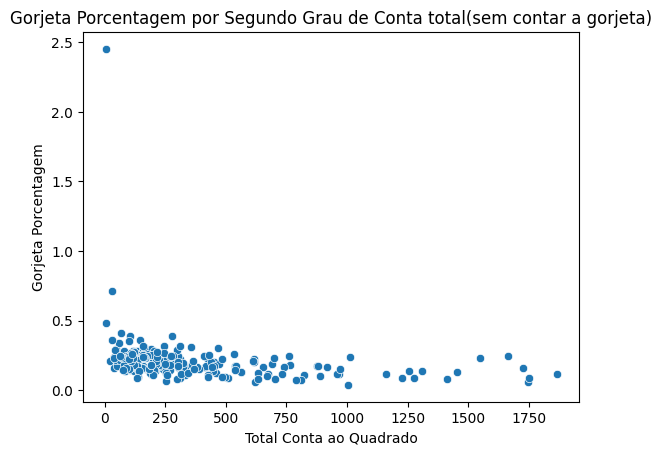

In [51]:
sns.scatterplot(x='squared_net_bill', y='tip_pct', data=tips)
plt.xlabel('Total Conta ao Quadrado')
plt.ylabel('Gorjeta Porcentagem')
plt.title('Gorjeta Porcentagem por Segundo Grau de Conta total(sem contar a gorjeta)')
plt.show()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [43]:
#Criando a coluna/variável log_tips_pct para guardar os logaritimos das porcentagens de gorgeta
tips['log_tip_pct'] = np.log(tips['tip_pct'])

In [52]:
#Ajustando para log_tips_pct (variável/coluna com os valores em log do tip_pct)
reg__log_tip_pct = smf.ols('log_tip_pct ~ net_bill', data = tips).fit()
reg__log_tip_pct.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_tip_pct   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           8.27e-16
Time:                        19:35:33   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.000      -1.385      -1.165
net_bill      -0.0259      0.003     -8.630      0.000      -0.032      -0.020
==============================================================================
Omnibus:                       49.929   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.392
Skew:                           0.664   Prob(JB):                     7.78e-57
Kurtosis:                       7.864   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#No summary já tem esse valor, não sei se interpretei errado o enunciado, porém segue o valor de R²
exe4_r_squared = reg__log_tip_pct.rsquared
print(exe4_r_squared)

0.23534487140864324


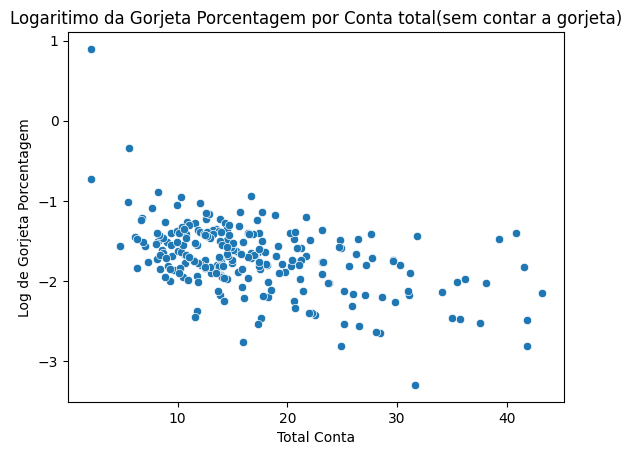

In [61]:
sns.scatterplot(x='net_bill', y='log_tip_pct', data=tips)
plt.xlabel('Total Conta')
plt.ylabel('Log de Gorjeta Porcentagem')
plt.title('Logaritimo da Gorjeta Porcentagem por Conta total(sem contar a gorjeta)')
plt.show()

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [47]:
#Criando a variável reg__double_log para ajustar os valores em logaritimo, tanto no target quanto na explicativa
reg__double_log = smf.ols('log_tip_pct ~ log_net_bill', data = tips).fit()
reg__double_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_tip_pct   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           5.20e-20
Time:                        19:26:46   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3942      0.133     -2.961      0.003      -0.657      -0.132
log_net_bill    -0.4849      0.048    -10.026      0.000      -0.580      -0.390
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

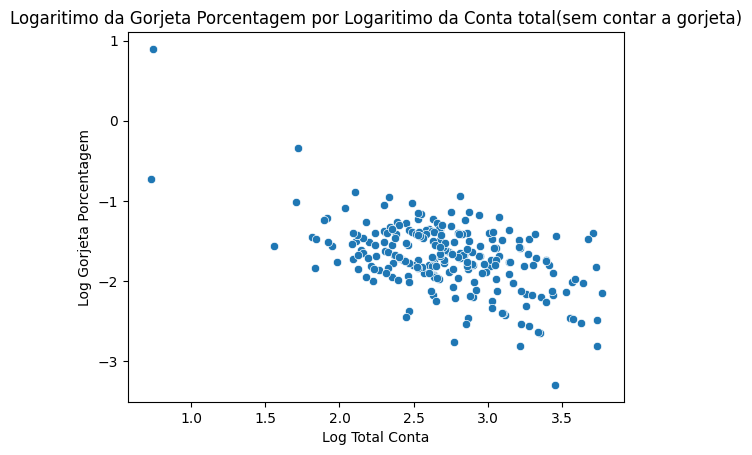

In [60]:
sns.scatterplot(x='log_net_bill', y='log_tip_pct', data=tips)
plt.xlabel('Log Total Conta')
plt.ylabel('Log Gorjeta Porcentagem')
plt.title('Logaritimo da Gorjeta Porcentagem por Logaritimo da Conta total(sem contar a gorjeta)')
plt.show()

In [55]:
#R² da comparação da variável target e explicativa em logaritimos
exe5_r_squared = reg__double_log.rsquared
print(exe5_r_squared)

0.2934740215080779


###  6. qual modelo resultou no melhor ajuste?

O modelo que parece que mais se ajustou foi o ultimo, na aplicação de log para ambos, pois obteve R² de 29,34%, porém essas variáveis sem o log tinha R² em 33%, porém se for analisar proporcionalmente, as gorgetas diminuem a medida que a conta aumenta e o resultado do R² do exercício 5 parece ser mais fiel ao que se propõe.